Keras implementaion of 'Deep convolutional neural network for the automated detection and diagnosis of seizure using EEG signals', U. Rajendra Acharya, Shu Lih Oh, Yuki Hagiwara, Jen Hong Tan, Hojjat Adeli.  https://www.ncbi.nlm.nih.gov/pubmed/28974302

In [1]:
import glob
import numpy as np

In [2]:
file_sets = ['O', 'N', 'S'] # O-> Set B (Normal ), N-> Set C (Pre-ictal) S-> Set E (Seizure)
label_sets = [1, 2, 3] # 1->Normal, 2->Preictal,  3-> Seizure

In [3]:
# data is in folders 'input/O, input/S' etc.
data=[]
labels = []
for file_set, label in zip(file_sets, label_sets):

    for file in glob.glob('input/'+ file_set +'/*.*'):
        with open(file) as f:
            int_list = [int(x) for x in f]
            data.append(int_list)
            labels.append(label)

In [4]:
data = np.asarray(data)
data.shape

(300, 4097)

In [5]:
data = data.reshape(300, 4097, 1)

In [6]:
labels = np.asarray(labels)
print(labels.shape)

(300,)


In [7]:
# randomize the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, 
                                                stratify = labels, random_state = 123)

In [10]:
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)

x_train shape: (225, 4097, 1)
x_val shape: (75, 4097, 1)


In [11]:
def one_hot(labels, n_class = 3):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

In [12]:
y_train = one_hot(y_train)
y_val = one_hot(y_val)

In [13]:
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=6, input_shape=x_train.shape[1:3],
                activation='relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=4, kernel_size=5, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=10, kernel_size=4, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=10, kernel_size=4, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=15, kernel_size=4, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001),
            metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4092, 4)           28        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2046, 4)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2042, 4)           84        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2042, 4)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1021, 4)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1018, 10)          170       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1018, 10)          0         
__________

In [15]:
history = model.fit(x_train,y_train, batch_size=3, epochs=150,validation_data=(x_val,y_val) )

Train on 225 samples, validate on 75 samples
Epoch 1/150
225/225 [==============================] - 2s - loss: 2.0990 - acc: 0.3511 - val_loss: 1.4139 - val_acc: 0.4133
Epoch 2/150
225/225 [==============================] - 0s - loss: 1.3210 - acc: 0.4844 - val_loss: 1.2065 - val_acc: 0.4267
Epoch 3/150
225/225 [==============================] - 0s - loss: 0.9763 - acc: 0.5556 - val_loss: 1.4802 - val_acc: 0.4667
Epoch 4/150
225/225 [==============================] - 0s - loss: 0.7845 - acc: 0.6489 - val_loss: 1.0803 - val_acc: 0.5200
Epoch 5/150
225/225 [==============================] - 0s - loss: 0.6740 - acc: 0.7067 - val_loss: 1.0473 - val_acc: 0.6267
Epoch 6/150
225/225 [==============================] - 0s - loss: 0.7643 - acc: 0.6844 - val_loss: 1.5015 - val_acc: 0.4000
Epoch 7/150
225/225 [==============================] - 0s - loss: 0.6613 - acc: 0.7511 - val_loss: 0.7977 - val_acc: 0.6400
Epoch 8/150
225/225 [==============================] - 0s - loss: 0.4741 - acc: 0.8178 

225/225 [==============================] - 0s - loss: 0.0010 - acc: 1.0000 - val_loss: 1.6416 - val_acc: 0.8400
Epoch 67/150
225/225 [==============================] - 0s - loss: 9.4958e-04 - acc: 1.0000 - val_loss: 1.5659 - val_acc: 0.8533
Epoch 68/150
225/225 [==============================] - 0s - loss: 9.0715e-04 - acc: 1.0000 - val_loss: 1.6514 - val_acc: 0.8400
Epoch 69/150
225/225 [==============================] - 0s - loss: 8.4217e-04 - acc: 1.0000 - val_loss: 1.6392 - val_acc: 0.8533
Epoch 70/150
225/225 [==============================] - 0s - loss: 8.0114e-04 - acc: 1.0000 - val_loss: 1.6566 - val_acc: 0.8400
Epoch 71/150
225/225 [==============================] - 0s - loss: 7.5534e-04 - acc: 1.0000 - val_loss: 1.6418 - val_acc: 0.8400
Epoch 72/150
225/225 [==============================] - 0s - loss: 7.1807e-04 - acc: 1.0000 - val_loss: 1.6586 - val_acc: 0.8400
Epoch 73/150
225/225 [==============================] - 0s - loss: 6.8466e-04 - acc: 1.0000 - val_loss: 1.6377 - v

225/225 [==============================] - 0s - loss: 4.3490e-05 - acc: 1.0000 - val_loss: 1.7979 - val_acc: 0.8667
Epoch 130/150
225/225 [==============================] - 0s - loss: 4.1603e-05 - acc: 1.0000 - val_loss: 1.8104 - val_acc: 0.8667cc: 
Epoch 131/150
225/225 [==============================] - 0s - loss: 3.9629e-05 - acc: 1.0000 - val_loss: 1.8044 - val_acc: 0.8667
Epoch 132/150
225/225 [==============================] - 0s - loss: 3.7929e-05 - acc: 1.0000 - val_loss: 1.7810 - val_acc: 0.8667
Epoch 133/150
225/225 [==============================] - 0s - loss: 3.6409e-05 - acc: 1.0000 - val_loss: 1.7941 - val_acc: 0.8667
Epoch 134/150
225/225 [==============================] - 0s - loss: 3.5262e-05 - acc: 1.0000 - val_loss: 1.8001 - val_acc: 0.8667
Epoch 135/150
225/225 [==============================] - 0s - loss: 3.3163e-05 - acc: 1.0000 - val_loss: 1.8289 - val_acc: 0.8667
Epoch 136/150
225/225 [==============================] - 0s - loss: 3.2056e-05 - acc: 1.0000 - val_l

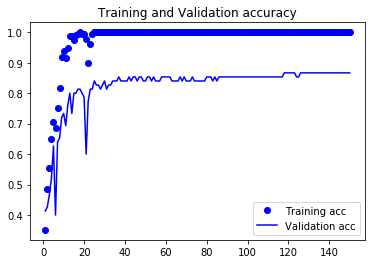

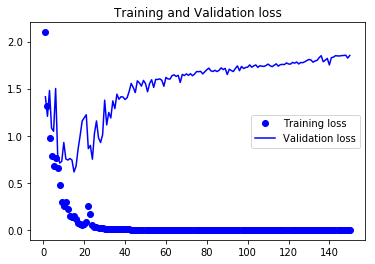

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()